In [52]:
import matplotlib.pyplot as plt
from MNIST import label_set, batch_data_iter
from MultilabelPerceptron import *
from MultilabelKernelPerceptron import *
from sklearn.kernel_approximation import Nystroem
from KMeans import compress as kmean_compress
from tqdm import tqdm
import json

In [8]:
(x_train, y_train), (x_test, y_test) = batch_data_iter(10_000, 500)
epochs = list(range(1, 11))
degrees = list(range(1, 7))

In [108]:
def scatter(c):
	x, y = zip(*[(e, d) for e in epochs for d in degrees])
	sc = plt.scatter(x, y, c=c, cmap="YlOrRd")
	cb = plt.colorbar(sc)
	cb.set_label("Error")
	plt.xlabel("Epochs")
	plt.ylabel("Degree")
	plt.show()

## Perceptron

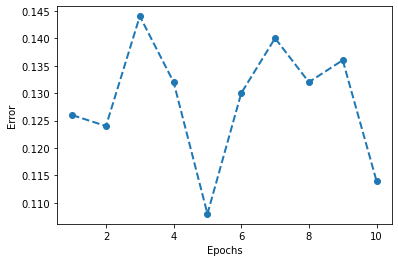

In [145]:
perceptron = json.load(open("./results/mp.json"))
errors = [perceptron["epochs_amount"][str(e)]["error"] for e in epochs]

p = plt.plot(epochs, errors, marker='o', linestyle='--', linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

## Nystrom

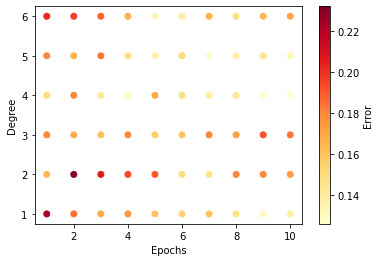

In [109]:
nystrom = json.load(open("./results/nmp.json"))
errors = [nystrom["degree"][str(d)]["epochs"][str(e)]["error"] for e in epochs for d in degrees]

scatter(errors)

## K-means

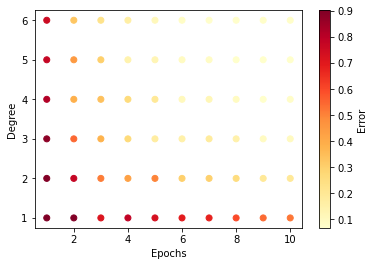

In [110]:
kmeans = json.load(open("./results/kmmkp.json"))
errors = [kmeans["epochs_amount"][str(e)]["degree"][str(d)]["error"] for e in epochs for d in degrees]

scatter(errors)